# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
# 결측치 존재 X
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Gender 컬럼 (문자형 데이터(범주형)인 성별 원핫 인코딩 처리)
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [6]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

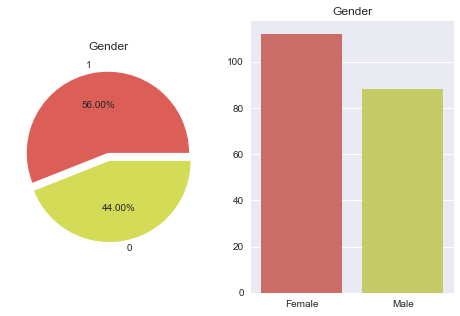

In [8]:
f, ax = plt.subplots(1, 2, figsize=(8,5))
df['Gender'].value_counts().plot.pie(explode = [0.05, 0.05],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Gender')
ax[0].set_ylabel(None)

sns.barplot(data = df['Gender'].value_counts().reset_index(), x = ['Female','Male'], y = 'Gender')
ax[1].set_title('Gender')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
plt.show()

[ Age ]
mean   : 38.85
median : 36.0


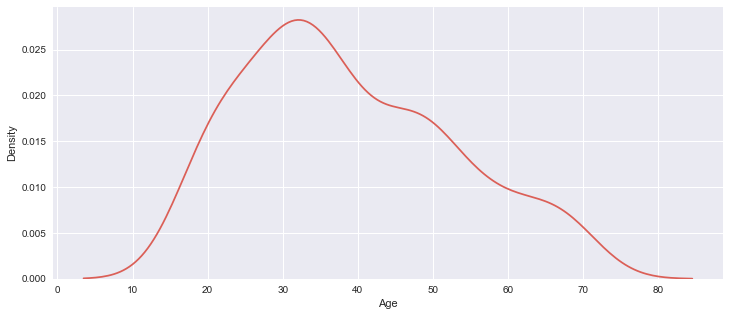

In [9]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Age'])
print('[ Age ]')
print('mean   :', df['Age'].mean())
print('median :', df['Age'].median())

[ Annual Income (k$) ]
mean   : 60.56
median : 61.5


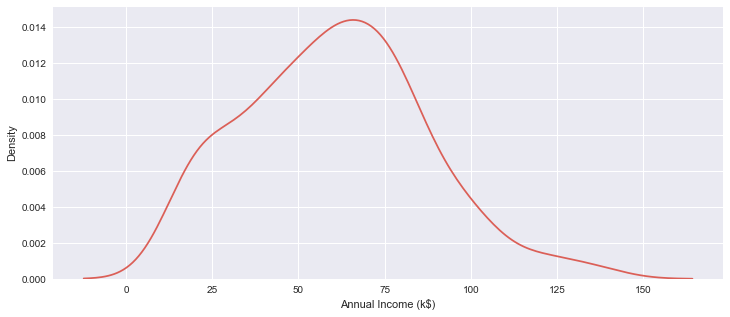

In [10]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Annual Income (k$)'])
print('[ Annual Income (k$) ]')
print('mean   :', df['Annual Income (k$)'].mean())
print('median :', df['Annual Income (k$)'].median())

[ Spending Score (1-100)]
mean   : 50.2
median : 50.0


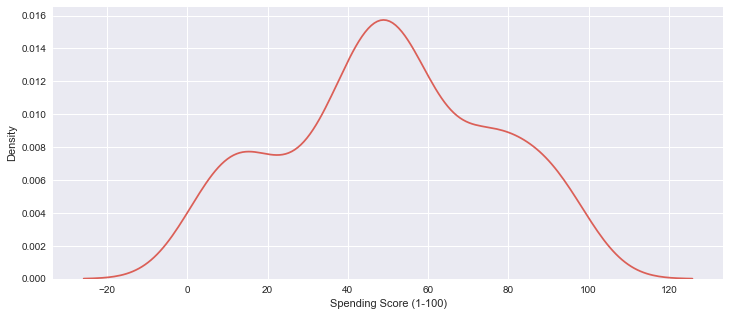

In [11]:
plt.figure(figsize=(12, 5))
sns.kdeplot(df['Spending Score (1-100)'])
print('[ Spending Score (1-100)]')
print('mean   :', df['Spending Score (1-100)'].mean())
print('median :', df['Spending Score (1-100)'].median())

## 2. Clustering 

### Hierarchical Clustering

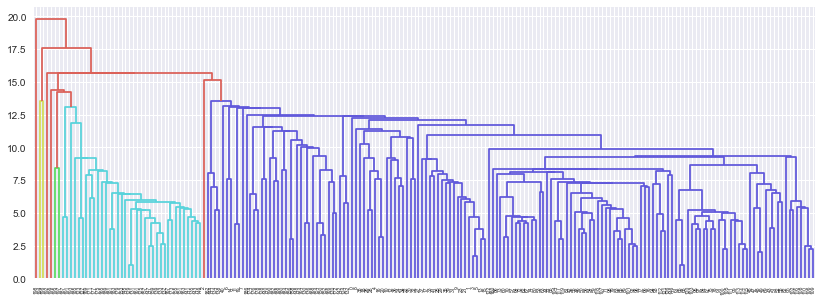

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

plt.figure(figsize=(14, 5))
clust_single = linkage(df, method='single')
dendrogram(clust_single)
plt.show()

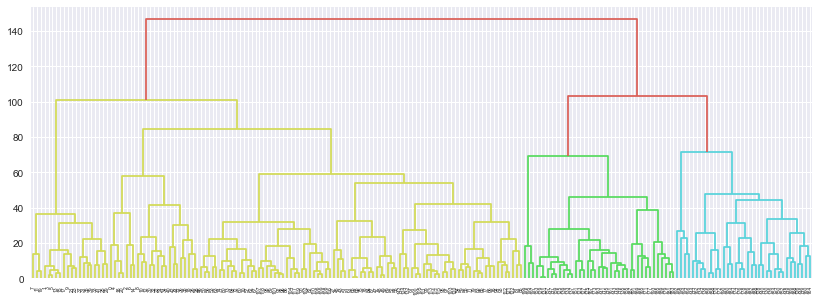

In [13]:
plt.figure(figsize=(14, 5))
clust_complete = linkage(df, method='complete')
dendrogram(clust_complete)
plt.show()

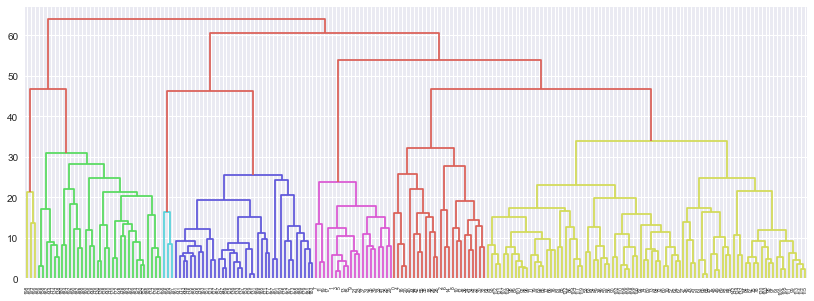

In [14]:
plt.figure(figsize=(14, 5))
clust_avg = linkage(df, method='average')
dendrogram(clust_avg)
plt.show()

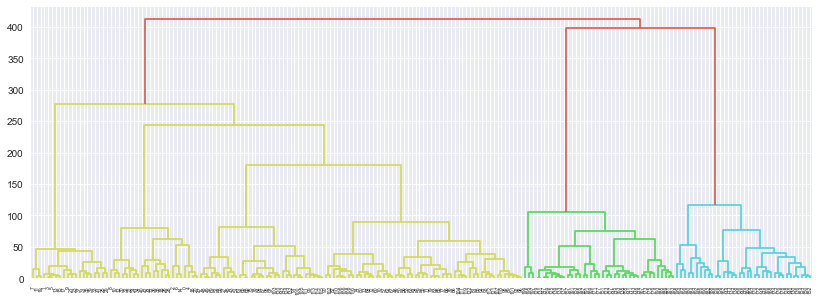

In [15]:
plt.figure(figsize=(14, 5))
clust_ward= linkage(df, method='ward')
dendrogram(clust_ward)
plt.show()

### Partitioning Clustering

#### K-Means

In [16]:
from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(1, 15, 2): # k 홀수로 
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    n_cluster += [n]
    sse += [kmeans.inertia_]

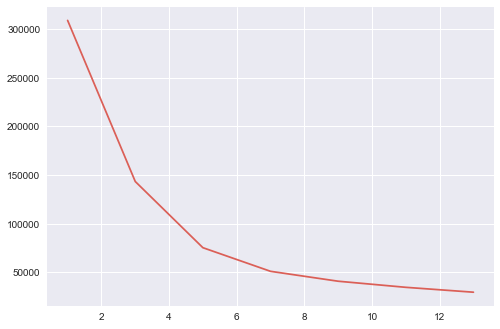

In [17]:
plt.plot(n_cluster, sse)

- k = 3 or k = 5

In [18]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(df) # K-Means 모델

df_clustered = df.copy()
df_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # 클러스터 label을 Cluster 열로 추가

In [19]:
print(df_clustered.loc[:,'Cluster'])

CustomerID
1      2
2      4
3      2
4      4
5      2
      ..
196    3
197    0
198    3
199    0
200    3
Name: Cluster, Length: 200, dtype: int32


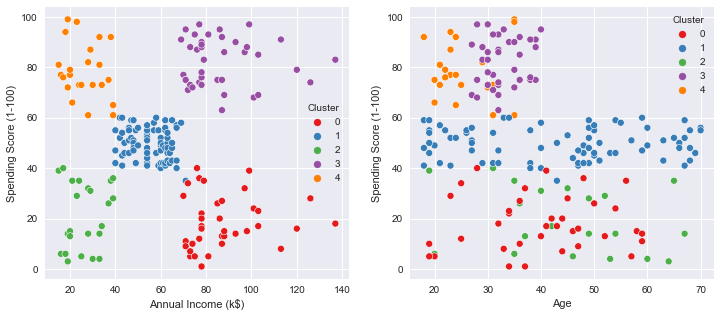

In [20]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x=df_clustered['Annual Income (k$)'],y=df_clustered['Spending Score (1-100)'],
                         hue=df_clustered['Cluster'], ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x=df_clustered['Age'],y=df_clustered['Spending Score (1-100)'],
                hue=df_clustered['Cluster'], palette='Set1', ax=axes[1], legend='full')

plt.show()

#### DBSCAN

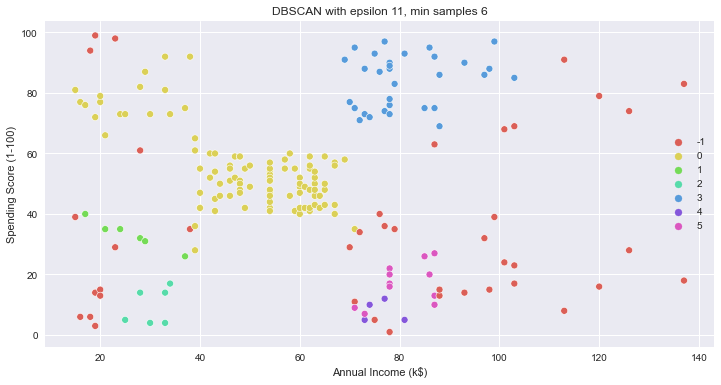

In [21]:
# 데이터의 밀도가 높지 않아 성능이 좋아 보이지 않음
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=4).fit(df)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'], hue=db.labels_, 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## 3. Evaluation

In [22]:
from sklearn.metrics import silhouette_score, silhouette_samples

# silhouette_coef 확인
average_score = silhouette_score(df_clustered.iloc[:,1:], df_clustered['Cluster'])
print(f'K-means Silhouette Score: {average_score}')

K-means Silhouette Score: 0.4442716848735851
